In [1]:
#importing a lot of unnecessary stuff, I know..
from __future__ import division, print_function, unicode_literals
import os
import ccdproc
import glob
import subprocess
import itertools
import numpy as np
from astropy import units as u
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.wcs import utils as wcsutils
from astropy.table import Table
from astropy.stats import sigma_clip
from astroquery.simbad import Simbad
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import rc, rcParams

In [2]:
%matplotlib inline

In [3]:
# Absolute path of the top level directory containing raw data
#need alter code to actually use this.
raw_root = "/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw"

In [4]:
# TO DO: 
# Make a loop or function that can automate this process for a given CCD name input. 
# Employ CCDProc and glob.glob to compactify the code.
# Pick up dry cleaning.

# 83F010771

### Median combine biases:

In [85]:
b1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_bias_12.fits')
b2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_bias_13.fits')
b3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_bias_14.fits')
b4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_bias_15.fits')
b5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_bias_16.fits')

bias1=b1[0].data
bias2=b2[0].data
bias3=b3[0].data
bias4=b4[0].data
bias5=b5[0].data

In [86]:
bias_stack=np.array([bias1, bias2, bias3, bias4, bias5])
bias_med = np.median(bias_stack, 0) 
bias_stack.shape

(5, 2532, 3352)

In [87]:
bias_std=np.std(bias_stack,axis=0)
bias_std.shape

(2532, 3352)

In [88]:
read_noise=bias_std*.37
# Median of med-stacked bias, Mean of med-stacked bias, Min of med-stacked bias, Max of med-stacked bias, Read noise
np.median(bias_med), bias_med.mean(), bias_med.min(), bias_med.max(), read_noise

(772.0,
 772.47968,
 703.0,
 963.0,
 array([[  5.52775526,  10.51581383,  13.32205486, ...,   5.66184616,
          10.57811832,   1.35644233],
        [ 11.64977264,   4.96737957,  11.5946455 , ...,   5.67633533,
          11.29076099,   6.13084555],
        [  1.92115188,   5.88939619,   6.53298903, ...,   5.574121  ,
          11.70183182,   5.15350389],
        ..., 
        [ 16.62515259,   7.77669191,  13.43747139, ...,  12.45092678,
           7.33309746,   7.89895821],
        [  5.84365845,   3.31268835,   4.28050184, ...,   8.60438919,
          15.2026329 ,   9.24555874],
        [ 12.41569138,   7.60581827,  10.90188599, ...,   9.54972839,
           8.32162857,   8.21566677]], dtype=float32))

In [89]:
# Mean and median of Read Noise
read_noise.mean(), np.median(read_noise), read_noise.shape

(8.0163689, 7.8055096, (2532, 3352))

### Median combine darks:

In [90]:
d1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_dark600_01.fits')
d2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_dark600_02.fits')
d3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_dark600_03.fits')
d4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_dark600_04.fits')
d5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_dark600_05.fits')
d6 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_dark600_06.fits')
d7 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_dark600_07.fits')
d8 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_dark600_08.fits')
d9 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_dark600_09.fits')
d10 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_dark600_10.fits')

dark1=d1[0].data
dark2=d2[0].data
dark3=d3[0].data
dark4=d4[0].data
dark5=d5[0].data
dark6=d6[0].data
dark7=d7[0].data
dark8=d8[0].data
dark9=d9[0].data
dark10=d10[0].data

In [91]:
dark1.mean(), dark2.mean(), dark3.mean(), dark4.mean(), dark5.mean(), dark6.mean(), dark7.mean(), dark8.mean(), dark9.mean(), dark10.mean()

(1238.0397,
 1208.6498,
 1213.0892,
 1228.1149,
 1212.9093,
 1212.3649,
 1208.6702,
 1216.5106,
 1206.8295,
 1199.6155)

In [92]:
dark_stack=np.array([dark1, dark2, dark3, dark4, dark5, dark6, dark7, dark8, dark9, dark10])
dark_med = np.median(dark_stack, 0) 

In [93]:
dark_med_biased=dark_med-bias_med
dark_med.mean(), dark_med_biased.mean(), np.median(dark_med), np.median(dark_med_biased)

(1214.0712, 441.59113, 1177.5, 405.0)

### Bias Temperatures

In [172]:
b1[0].header['TEMPERAT'], b2[0].header['TEMPERAT'], b3[0].header['TEMPERAT'], b4[0].header['TEMPERAT'], b5[0].header['TEMPERAT']

(-9.37, -9.37, -9.37, -9.37, -9.37)

### Dark Temperatures

In [180]:
d1[0].header['TEMPERAT'], d2[0].header['TEMPERAT'], d3[0].header['TEMPERAT'], d4[0].header['TEMPERAT'], d5[0].header['TEMPERAT'],d6[0].header['TEMPERAT'], d7[0].header['TEMPERAT'], d8[0].header['TEMPERAT'], d9[0].header['TEMPERAT'], d10[0].header['TEMPERAT'],d11[0].header['TEMPERAT'],   

(-13.5, -10.6, -9.79, -9.37, -9.37, -9.79, -9.79, -9.79, -9.37, -9.37, -9.79)

### Write bias-subtracted master dark to file

In [179]:
darkmedbiased=fits.PrimaryHDU(dark_med_biased)

In [69]:
darkmedbiased.writeto('83F010771_dark_med_combine.fits')

## Visualization of Bias (median)

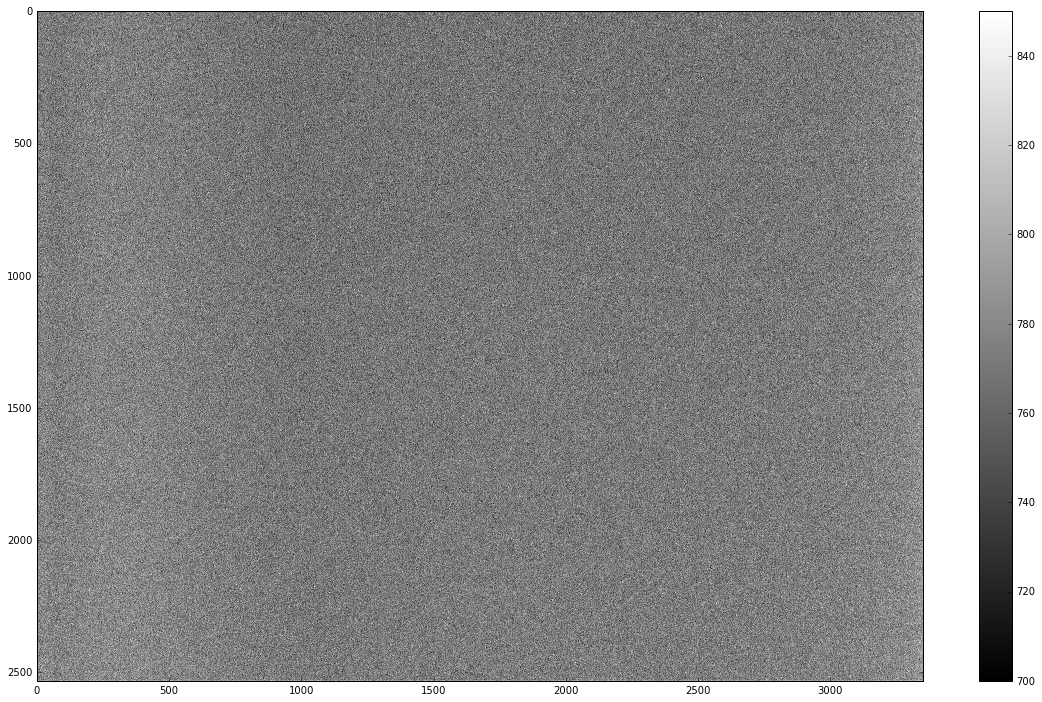

In [101]:
plt.imshow(bias_med, cmap='gray', aspect='equal', interpolation='none')
plt.colorbar() 
plt.clim(700, 850)
plt.gcf().set_size_inches(20,12)

## Visualization of Read noise

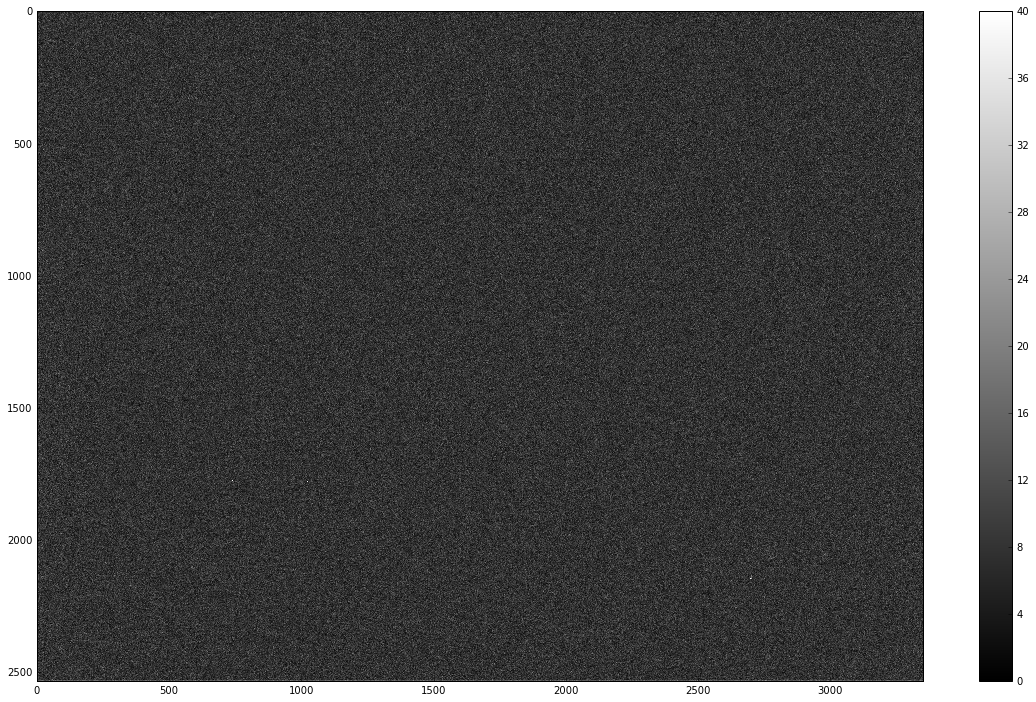

In [83]:
plt.imshow(read_noise, cmap='gray', aspect='equal', interpolation='none')
plt.colorbar() 
plt.clim(0, 40)
plt.gcf().set_size_inches(20,12)

## Visualization of (bias-subtracted) dark

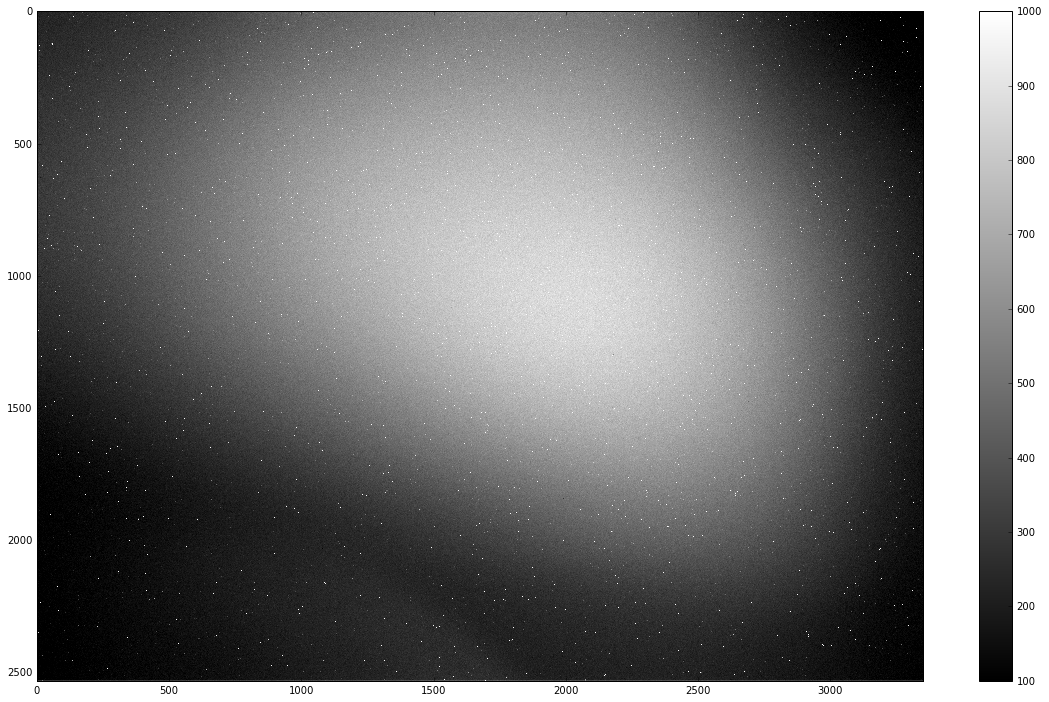

In [56]:
plt.imshow(dark_med_biased, cmap='gray', aspect='equal', interpolation='none')
plt.colorbar() 
plt.clim(100,1000)
plt.gcf().set_size_inches(20,12)

# 83F010771 Round 2

### Median combine biases:

In [102]:
b1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_17_bias.fits')
b2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_18_bias.fits')
b3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_19_bias.fits')
b4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_20_bias.fits')
b5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_21_bias.fits')
b6 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_17_bias.fits')
b7 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_18_bias.fits')
b8 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_19_bias.fits')
b9 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_20_bias.fits')
b10 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_21_bias.fits')


bias1=b1[0].data
bias2=b2[0].data
bias3=b3[0].data
bias4=b4[0].data
bias5=b5[0].data
bias6=b6[0].data
bias7=b7[0].data
bias8=b8[0].data
bias9=b9[0].data
bias10=b10[0].data

In [108]:
bias_stack=np.array([bias1, bias2, bias3, bias4, bias5, bias6, bias7, bias8, bias9, bias10])
bias_med = np.median(bias_stack, 0) 
bias_std=np.std(bias_stack,axis=0)
bias_std.shape

(2532, 3352)

In [109]:
# ADU -> e/p/s conversion = 0.37 as per SBIG
read_noise=bias_std*.37
# Median of med-stacked bias, Mean of med-stacked bias, Min of med-stacked bias, Max of med-stacked bias, Standard Dev
# of med-stacked bias.
np.median(bias_med), bias_med.mean(), bias_med.min(), bias_med.max(), read_noise

(742.0,
 741.98083,
 667.0,
 953.0,
 array([[  8.03981972,  12.41216278,   6.61627865, ...,  11.0307169 ,
           5.82488632,   9.17003059],
        [  6.50190115,  13.04458618,   9.73205566, ...,  11.79922962,
          14.44915199,  10.40851498],
        [ 11.53925514,   4.86940241,   5.1831708 , ...,   6.65753269,
           3.54428315,   6.64188623],
        ..., 
        [  6.0598731 ,  10.15068626,   9.18315887, ...,   9.46621799,
           5.15350389,   5.44491196],
        [  8.91815186,  10.45104313,  11.1162672 , ...,   3.68219757,
           4.740623  ,   6.7983408 ],
        [ 10.23396111,   5.69078779,   9.08544064, ...,   7.93354559,
           8.81687546,  12.7945118 ]], dtype=float32))

In [110]:
# Mean of St.D. of bias, median of St. D. of bias
read_noise.mean(), np.median(read_noise)

(8.0409851, 7.8363166)

### Median combine darks:

In [111]:
d1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_2_dark.fits')
d2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_3_dark.fits')
d3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_4_dark.fits')
d4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_5_dark.fits')
d5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_6_dark.fits')
d6 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_7_dark.fits')
d7 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_8_dark.fits')
d8 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_9_dark.fits')
d9 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_10_dark.fits')
d10 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_11_dark.fits')
d11 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_12_dark.fits')
d12 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_13_dark.fits')
d13 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_14_dark.fits')
d14 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_15_dark.fits')
d15 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-17/83F010771_16_dark.fits')

dark1=d1[0].data
dark2=d2[0].data
dark3=d3[0].data
dark4=d4[0].data
dark5=d5[0].data
dark6=d6[0].data
dark7=d7[0].data
dark8=d8[0].data
dark9=d9[0].data
dark10=d10[0].data
dark11=d11[0].data
dark12=d12[0].data
dark13=d13[0].data
dark14=d14[0].data
dark15=d15[0].data

In [112]:
dark1.mean(), dark2.mean(), dark3.mean(), dark4.mean(), dark5.mean(), dark6.mean(), dark7.mean(), dark8.mean(), dark9.mean(), dark10.mean(), dark11.mean(), dark12.mean(), dark13.mean(), dark14.mean(), dark15.mean()

(1239.7098,
 1296.6089,
 1266.4614,
 1268.3464,
 1259.9779,
 1224.2561,
 1263.1626,
 1319.2698,
 1267.8712,
 1265.3539,
 1275.5367,
 1300.5941,
 1209.9919,
 1150.8271,
 1069.5491)

In [113]:
dark_stack=np.array([dark1, dark2, dark3, dark4, dark5, dark6, dark7, dark8, dark9, dark10, dark11, dark12, dark13, dark14, dark15])
dark_med = np.median(dark_stack, 0) 

In [114]:
dark_med_biased=dark_med-bias_med
dark_med.mean(), dark_med_biased.mean(), np.median(dark_med), np.median(dark_med_biased)

(1256.4294, 514.44891, 1209.0, 467.0)

# 83F010774

In [153]:
b1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_bias_11.fits')
b2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_bias_12.fits')
b3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_bias_13.fits')
b4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_bias_14.fits')
b5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_bias_15.fits')

bias1=b1[0].data
bias2=b2[0].data
bias3=b3[0].data
bias4=b4[0].data
bias5=b5[0].data

In [154]:
bias_stack=np.array([bias1, bias2, bias3, bias4, bias5])
bias_med = np.median(bias_stack, 0) 
bias_std=np.std(bias_stack,axis=0)
bias_std.shape

(2532, 3352)

In [155]:
# ADU -> e/p/s conversion = 0.37 as per SBIG
read_noise=bias_std*.37
# Median of med-stacked bias, Mean of med-stacked bias, Min of med-stacked bias, Max of med-stacked bias, Standard Dev
# of med-stacked bias.
np.median(bias_med), bias_med.mean(), bias_med.min(), bias_med.max(), read_noise

(1031.0,
 1030.9056,
 956.0,
 1572.0,
 array([[  7.61373329,   2.72295856,   8.04866982, ...,   4.71862459,
          10.98843956,   7.12631941],
        [  8.36756516,   4.66023779,   7.20655203, ...,  15.42576218,
           5.71958256,   6.94812346],
        [  7.92387629,   6.91969252,  13.01348495, ...,   7.07851696,
           4.10283136,   6.21952295],
        ..., 
        [  6.41456652,   6.90781212,   8.51611137, ...,  10.36105728,
          11.21679974,   7.01479387],
        [ 10.91192627,   9.97052193,  12.25677776, ...,   6.27474689,
           9.25739765,   5.90888977],
        [  8.96286392,  12.77352428,   4.32377911, ...,  13.41707993,
          10.45104313,   6.81282425]], dtype=float32))

In [156]:
# Mean of St.D. of bias, median of St. D. of bias
read_noise.mean(), np.median(read_noise)

(7.988246, 7.7858405)

### Bias Temperatures

In [157]:
b1[0].header['TEMPERAT'], b2[0].header['TEMPERAT'], b3[0].header['TEMPERAT'], b4[0].header['TEMPERAT'], b5[0].header['TEMPERAT']

(-9.79, -9.79, -9.79, -9.79, -9.79)

In [158]:
d1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_dark600_01.fits')
d2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_dark600_02.fits')
d3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_dark600_03.fits')
d4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_dark600_04.fits')
d5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_dark600_05.fits')
d6 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_dark600_06.fits')
d7 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_dark600_07.fits')
d8 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_dark600_08.fits')
d9 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_dark600_09.fits')
d10 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_dark600_10.fits')

dark1=d1[0].data
dark2=d2[0].data
dark3=d3[0].data
dark4=d4[0].data
dark5=d5[0].data
dark6=d6[0].data
dark7=d7[0].data
dark8=d8[0].data
dark9=d9[0].data
dark10=d10[0].data

### Dark Temperatures

In [159]:
d1[0].header['TEMPERAT'], d2[0].header['TEMPERAT'], d3[0].header['TEMPERAT'], d4[0].header['TEMPERAT'], d5[0].header['TEMPERAT'],d6[0].header['TEMPERAT'], d7[0].header['TEMPERAT'], d8[0].header['TEMPERAT'], d9[0].header['TEMPERAT'], d10[0].header['TEMPERAT'],d11[0].header['TEMPERAT'],   

(-9.79, -9.79, -9.79, -9.79, -9.79, -9.79, -9.79, -9.79, -9.79, -10.2, -9.79)

In [160]:
dark_stack=np.array([dark1, dark2, dark3, dark4, dark5, dark6, dark7, dark8, dark9, dark10])
dark_med = np.median(dark_stack, 0) 
dark_med.shape

(2532, 3352)

In [161]:
dark_med_biased=dark_med-bias_med
dark_med.mean(), np.median(dark_med), dark_med_biased.mean(), np.median(dark_med_biased)

(1131.948, 1123.5, 101.04193, 93.0)

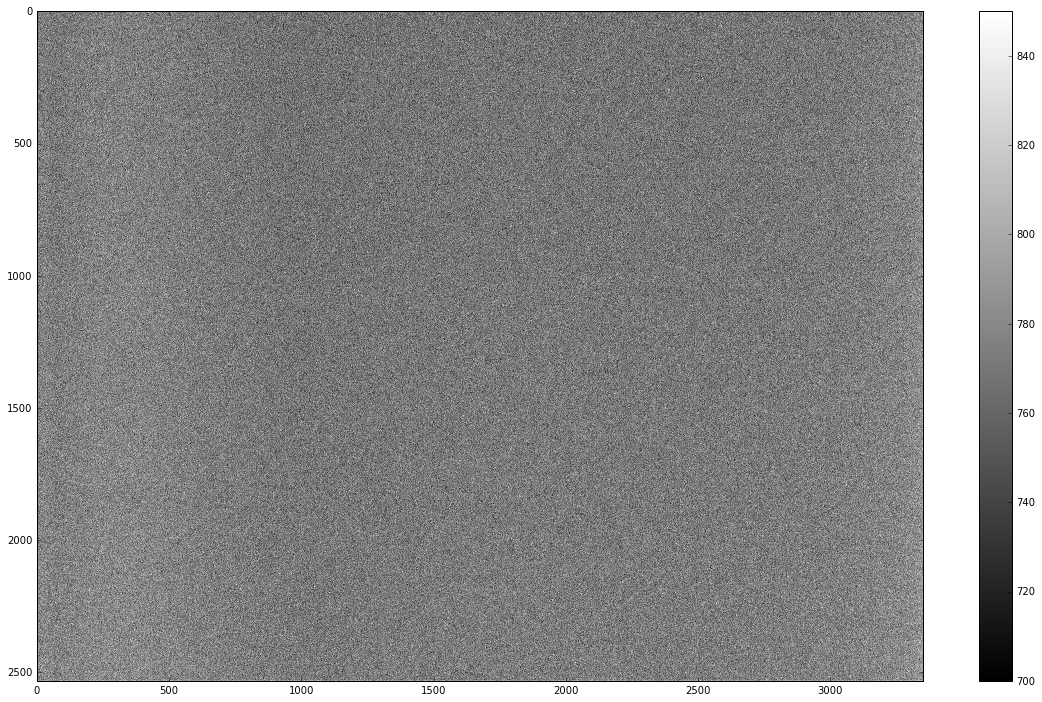

In [101]:
plt.imshow(bias_med, cmap='gray', aspect='equal', interpolation='none')
plt.colorbar() 
plt.clim(700, 850)
plt.gcf().set_size_inches(20,12)

In [84]:
darkmedbiased=fits.PrimaryHDU(dark_med_biased)
darkmedbiased.writeto('83F010774_dark_med_biased.fits')

# 83F010801

## Biases

In [22]:
b1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_bias_01.fits')
b2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_bias_02.fits')
b3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_bias_03.fits')
b4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_bias_04.fits')
b5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_bias_05.fits')
b6 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_bias_06.fits')
b7 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_bias_07.fits')
b8 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_bias_08.fits')

bias1=b1[0].data
bias2=b2[0].data
bias3=b3[0].data
bias4=b4[0].data
bias5=b5[0].data
bias6=b6[0].data
bias7=b7[0].data
bias8=b8[0].data

In [30]:
bias_stack=np.array([bias1, bias2, bias3, bias4, bias5, bias6, bias7, bias8])
bias_med = np.median(bias_stack, 0) 
bias_std=np.std(bias_stack,axis=2)
bias_std=bias_std*.37
bias_med.mean(), bias_med.min(), bias_med.max(), bias_std

(797.30969,
 735.0,
 2151.5,
 array([[ 10.14442158,  10.21155453,  10.11683464, ...,  10.09659004,
          10.13535786,  10.06167984],
        [ 10.06797218,   9.96084785,   9.91075802, ...,  10.27567196,
           9.98375893,  10.37836456],
        [ 10.0384798 ,   9.93179131,  10.00634956, ...,  10.19673729,
          10.17996693,  10.08365726],
        ..., 
        [ 10.08016396,  10.22119999,  10.09130478, ...,  10.34240055,
          10.39208603,  10.34237671],
        [ 10.1153326 ,   9.97434139,  10.26775265, ...,  10.3018856 ,
          10.37741375,  10.43462753],
        [ 10.30047035,  10.03583813,  10.09288406, ...,  10.35275173,
          10.4823513 ,  10.08559036]], dtype=float32))

In [10]:
d1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_15.fits')
d2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_02.fits')
d3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_03.fits')
d4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_04.fits')
d5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_05.fits')
d6 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_06.fits')
d7 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_07.fits')
d8 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_08.fits')
d9 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_09.fits')
d10 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_10.fits')
d11 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_11.fits')
d12 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_12.fits')
d13 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_13.fits')
d14 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_14.fits')

dark1=d1[0].data
dark2=d2[0].data
dark3=d3[0].data
dark4=d4[0].data
dark5=d5[0].data
dark6=d6[0].data
dark7=d7[0].data
dark8=d8[0].data
dark9=d9[0].data
dark10=d10[0].data
dark11=d11[0].data
dark12=d12[0].data
dark13=d13[0].data
dark14=d14[0].data

### Individual bias means

In [11]:
b1[0].data.mean(), b2[0].data.mean(), b3[0].data.mean(), b4[0].data.mean(), b5[0].data.mean(), b6[0].data.mean(), b7[0].data.mean(), b8[0].data.mean()

(804.42657,
 804.27222,
 804.00494,
 790.21991,
 792.01318,
 793.63757,
 794.48877,
 795.58295)

### Individual Dark means

In [12]:
dark1.mean(), dark2.mean(), dark3.mean(), dark4.mean(), dark5.mean(), dark6.mean(), dark7.mean(), dark8.mean(), dark9.mean(), dark10.mean(), dark11.mean(), dark12.mean(), dark13.mean(), dark14.mean()

(771.97089,
 765.71436,
 759.69666,
 759.45477,
 773.15259,
 774.20483,
 772.68134,
 770.8692,
 772.52197,
 772.94647,
 762.35767,
 758.11652,
 770.2359,
 771.63727)

In [16]:
dark_stack=np.array([dark1, dark2, dark3, dark4, dark5, dark6, dark7, dark8, dark9, dark10, dark11, dark12, dark13, dark14])
dark_med = np.median(dark_stack, 0) 
dark_med.mean(), dark_med.min(), dark_med.max()

(768.26605, 511.0, 65535.0)

In [18]:
dark_med_biased=dark_med-bias_med
dark_med.mean(), dark_med_biased.mean(), dark_med_biased.min(), dark_med_biased.max()

(768.26605, -29.043228, -290.5, 64756.5)

### Bias Temperatures

In [19]:
b1[0].header['TEMPERAT'], b2[0].header['TEMPERAT'], b3[0].header['TEMPERAT'], b4[0].header['TEMPERAT'], b5[0].header['TEMPERAT'],b6[0].header['TEMPERAT'], b7[0].header['TEMPERAT'], b8[0].header['TEMPERAT']

(-8.54, -8.54, -8.54, -9.37, -9.37, -9.37, -9.37, -9.37)

### Dark Temperatures

In [20]:
d1[0].header['TEMPERAT'], d2[0].header['TEMPERAT'], d3[0].header['TEMPERAT'], d4[0].header['TEMPERAT'], d5[0].header['TEMPERAT'],d6[0].header['TEMPERAT'], d7[0].header['TEMPERAT'], d8[0].header['TEMPERAT'], d9[0].header['TEMPERAT'], d10[0].header['TEMPERAT'], d11[0].header['TEMPERAT'] , d12[0].header['TEMPERAT'], d13[0].header['TEMPERAT'], d14[0].header['TEMPERAT']

(-8.96,
 -9.79,
 -10.2,
 -10.2,
 -8.96,
 -8.96,
 -8.96,
 -9.37,
 -8.96,
 -8.96,
 -10.2,
 -10.6,
 -9.37,
 -9.37)

In [102]:
darkmedbiased=fits.PrimaryHDU(dark_med_biased)
darkmedbiased.writeto('83F010801_dark_med_biased.fits')

# 83F010801 Round 2: -10C (2015-12-17)

In [231]:
b1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_16_bias.fits')
b2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_17_bias.fits')
b3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_18_bias.fits')
b4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_19_bias.fits')
b5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_20_bias.fits')
b6 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_21_bias.fits')
b7 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_22_bias.fits')
b8 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_23_bias.fits')
b9 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_22_bias.fits')
b10 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_23_bias.fits')

btot = b1[0].data+b2[0].data+b3[0].data+b4[0].data+b5[0].data+b6[0].data+b7[0].data+b8[0].data+b9[0].data+b10[0].data
bias = (btot[:,:]/10.0)

In [232]:
bias.mean(), bias.min(), bias.max()

(765.68988, 708.09998, 2011.6)

In [233]:
d1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_1_dark.fits')
d2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_2_dark.fits')
d3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_3_dark.fits')
d4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_4_dark.fits')
d5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_5_dark.fits')
d6 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_6_dark.fits')
d7 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_7_dark.fits')
d8 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_8_dark.fits')
d9 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_9_dark.fits')
d10 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_10_dark.fits')
d11 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_11_dark.fits')
d12 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_12_dark.fits')
d13 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_13_dark.fits')
d14 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_14_dark.fits')
d15 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_15_dark.fits')

dark1=d1[0].data
dark2=d2[0].data
dark3=d3[0].data
dark4=d4[0].data
dark5=d5[0].data
dark6=d6[0].data
dark7=d7[0].data
dark8=d8[0].data
dark9=d9[0].data
dark10=d10[0].data
dark11=d11[0].data
dark12=d12[0].data
dark13=d13[0].data
dark14=d14[0].data
dark15=d15[0].data

### Bias Temperatures

In [234]:
b1[0].header['TEMPERAT'], b2[0].header['TEMPERAT'], b3[0].header['TEMPERAT'], b4[0].header['TEMPERAT'], b5[0].header['TEMPERAT'],b6[0].header['TEMPERAT'], b7[0].header['TEMPERAT'], b8[0].header['TEMPERAT'], b7[0].header['TEMPERAT'], b8[0].header['TEMPERAT']

(-9.79, -10.2, -9.79, -10.2, -10.2, -9.79, -9.79, -9.79, -9.79, -9.79)

### Dark Temperatures

In [235]:
d1[0].header['TEMPERAT'], d2[0].header['TEMPERAT'], d3[0].header['TEMPERAT'], d4[0].header['TEMPERAT'], d5[0].header['TEMPERAT'],d6[0].header['TEMPERAT'], d7[0].header['TEMPERAT'], d8[0].header['TEMPERAT'], d9[0].header['TEMPERAT'], d10[0].header['TEMPERAT'], d11[0].header['TEMPERAT'] , d12[0].header['TEMPERAT'], d13[0].header['TEMPERAT'], d14[0].header['TEMPERAT'], d14[0].header['TEMPERAT']

(-9.79,
 -9.79,
 -10.2,
 -9.79,
 -9.79,
 -9.79,
 -9.79,
 -9.79,
 -10.2,
 -9.79,
 -10.2,
 -9.79,
 -9.79,
 -10.2,
 -10.2)

### Individual Bias Means

In [237]:
b1[0].data.mean(), b2[0].data.mean(), b3[0].data.mean(), b4[0].data.mean(), b5[0].data.mean(), b6[0].data.mean(), b7[0].data.mean(), b8[0].data.mean(), b7[0].data.mean(), b8[0].data.mean()

(760.98126,
 763.21173,
 764.30292,
 765.40918,
 765.73462,
 766.49719,
 767.10834,
 768.27399,
 767.10834,
 768.27399)

### Individual Dark Means

In [238]:
dark1.mean(), dark2.mean(), dark3.mean(), dark4.mean(), dark5.mean(), dark6.mean(), dark7.mean(), dark8.mean(), dark9.mean(), dark10.mean(), dark11.mean(), dark12.mean(), dark13.mean(), dark14.mean(), dark15.mean()

(729.80286,
 734.47571,
 736.95618,
 740.05963,
 739.57452,
 737.52722,
 734.81824,
 732.43341,
 728.47107,
 728.61731,
 731.07648,
 732.43445,
 728.77686,
 725.94135,
 724.70599)

In [239]:
dark_stack=np.array([dark1, dark2, dark3, dark4, dark5, dark6, dark7, dark8, dark9, dark10, dark11, dark12, dark13, dark14, dark15])
dark_med = np.median(dark_stack, 0) 
dark_med.shape

(2532, 3352)

In [240]:
dark_med_biased=dark_med-bias
dark_med.mean(), dark_med_biased.mean()

(732.2113, -33.478493)

In [102]:
darkmedbiased=fits.PrimaryHDU(dark_med_biased)
darkmedbiased.writeto('83F010801_dark_med_biased.fits')

# 83F010801 Round 3: -5C (2015-12-17)

In [5]:
b1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_41_bias.fits')
b2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_42_bias.fits')
b3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_43_bias.fits')
b4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_44_bias.fits')
b5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_45_bias.fits')
b6 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_46_bias.fits')
b7 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_47_bias.fits')
b8 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_48_bias.fits')
b9 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_49_bias.fits')
b10 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_50_bias.fits')


btot = b1[0].data+b2[0].data+b3[0].data+b4[0].data+b5[0].data+b6[0].data+b7[0].data+b8[0].data+b9[0].data+b10[0].data
bias = (btot[:,:]/10.0)

In [6]:
bias.mean(), bias.min(), bias.max()

(764.47673836939623, 713.5, 2452.5)

In [7]:
d1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_26_dark.fits')
d2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_27_dark.fits')
d3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_28_dark.fits')
d4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_29_dark.fits')
d5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_30_dark.fits')
d6 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_31_dark.fits')
d7 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_32_dark.fits')
d8 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_33_dark.fits')
d9 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_34_dark.fits')
d10 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_35_dark.fits')
d11 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_36_dark.fits')
d12 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_37_dark.fits')
d13 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_38_dark.fits')
d14 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_39_dark.fits')
d15 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_40_dark.fits')


dark1=d1[0].data
dark2=d2[0].data
dark3=d3[0].data
dark4=d4[0].data
dark5=d5[0].data
dark6=d6[0].data
dark7=d7[0].data
dark8=d8[0].data
dark9=d9[0].data
dark10=d10[0].data
dark11=d11[0].data
dark12=d12[0].data
dark13=d13[0].data
dark14=d14[0].data
dark15=d15[0].data

### Bias Temperatures

In [8]:
b1[0].header['TEMPERAT'], b2[0].header['TEMPERAT'], b3[0].header['TEMPERAT'], b4[0].header['TEMPERAT'], b5[0].header['TEMPERAT'],b6[0].header['TEMPERAT'], b7[0].header['TEMPERAT'], b8[0].header['TEMPERAT'], b7[0].header['TEMPERAT'], b8[0].header['TEMPERAT']

(-4.82, -4.82, -5.23, -4.82, -4.82, -5.23, -4.82, -5.23, -4.82, -5.23)

### Dark Temperatures

In [9]:
d1[0].header['TEMPERAT'], d2[0].header['TEMPERAT'], d3[0].header['TEMPERAT'], d4[0].header['TEMPERAT'], d5[0].header['TEMPERAT'],d6[0].header['TEMPERAT'], d7[0].header['TEMPERAT'], d8[0].header['TEMPERAT'], d9[0].header['TEMPERAT'], d10[0].header['TEMPERAT'], d11[0].header['TEMPERAT'] , d12[0].header['TEMPERAT'], d13[0].header['TEMPERAT'], d14[0].header['TEMPERAT'], d14[0].header['TEMPERAT']

(-5.23,
 -5.23,
 -5.23,
 -5.23,
 -4.82,
 -4.82,
 -5.23,
 -5.23,
 -4.82,
 -4.82,
 -4.82,
 -5.23,
 -5.23,
 -4.82,
 -4.82)

### Individual Bias Means

In [10]:
b1[0].data.mean(), b2[0].data.mean(), b3[0].data.mean(), b4[0].data.mean(), b5[0].data.mean(), b6[0].data.mean(), b7[0].data.mean(), b8[0].data.mean(), b7[0].data.mean(), b8[0].data.mean()

(760.69171678882617,
 761.84584313625692,
 762.9718771561719,
 763.9524944670037,
 765.07862899044972,
 765.53908161687912,
 765.75651800156095,
 766.00119449565841,
 765.75651800156095,
 766.00119449565841)

### Individual Dark Means

In [11]:
dark1.mean(), dark2.mean(), dark3.mean(), dark4.mean(), dark5.mean(), dark6.mean(), dark7.mean(), dark8.mean(), dark9.mean(), dark10.mean(), dark11.mean(), dark12.mean(), dark13.mean(), dark14.mean(), dark15.mean()

(699.11367774114251,
 688.07785147251218,
 695.46800747567181,
 706.6529019245778,
 714.49793561270155,
 718.39358337386466,
 721.02714549706479,
 723.51608433530521,
 723.49822746175914,
 726.13083085432481,
 726.71128587492979,
 727.18321440219131,
 727.23658059888317,
 727.9883815326117,
 728.40328437998392)

In [12]:
dark_stack=np.array([dark1, dark2, dark3, dark4, dark5, dark6, dark7, dark8, dark9, dark10, dark11, dark12, dark13, dark14, dark15])
dark_med = np.median(dark_stack, 0) 
dark_med.shape

(2532, 3352)

In [13]:
dark_med_biased=dark_med-bias
dark_med.mean(), dark_med_biased.mean()

(717.24186251305491, -47.234875856341937)

In [14]:
darkmedbiased=fits.PrimaryHDU(dark_med_biased)
darkmedbiased.writeto('83F010801_dark_med_biased.fits')

# 83F011167

In [200]:
b1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_bias_01.fits')
b2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_bias_02.fits')
b3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_bias_03.fits')
b4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_bias_04.fits')
b5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_bias_05.fits')
b6 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_bias_06.fits')
b7 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_bias_07.fits')
b8 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_bias_08.fits')
b9 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_bias_09.fits')
b10 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_bias_10.fits')

btot = b1[0].data+b2[0].data+b3[0].data+b4[0].data+b5[0].data+b6[0].data+b7[0].data+b8[0].data+b9[0].data+b10[0].data
bias = (btot[:,:]/10.0)

In [201]:
bias.mean(), bias.min(), bias.max()

(1019.3486, 255.0, 1252.0)

In [202]:
d1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_01.fits')
d2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_02.fits')
d3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_03.fits')
d4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_04.fits')
d5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_05.fits')
d6 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_06.fits')
d7 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_07.fits')
d8 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_08.fits')
d9 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_09.fits')
d10 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_10.fits')
d11 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_11.fits')
d12 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_12.fits')
d13 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_13.fits')
d14 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_14.fits')
d15 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_15.fits')

dark1=d1[0].data
dark2=d2[0].data
dark3=d3[0].data
dark4=d4[0].data
dark5=d5[0].data
dark6=d6[0].data
dark7=d7[0].data
dark8=d8[0].data
dark9=d9[0].data
dark10=d10[0].data
dark11=d11[0].data
dark12=d12[0].data
dark13=d13[0].data
dark14=d14[0].data
dark15=d15[0].data

In [203]:
dark1.shape, bias.shape

((2532, 3352), (2532, 3352))

In [204]:
dark_stack=np.array([dark1, dark2, dark3, dark4, dark5, dark6, dark7, dark8, dark9, dark10, dark11, dark12, dark13, dark14, dark15])
dark_med = np.median(dark_stack, 0) 
dark_med.shape

(2532, 3352)

In [205]:
dark_med_biased=dark_med-bias
dark_med.mean(), dark_med_biased.mean()

(1072.7992, 53.450417)

### Bias Temperatures

In [206]:
b1[0].header['TEMPERAT'], b2[0].header['TEMPERAT'], b3[0].header['TEMPERAT'], b4[0].header['TEMPERAT'], b5[0].header['TEMPERAT'],b6[0].header['TEMPERAT'], b7[0].header['TEMPERAT'], b8[0].header['TEMPERAT'], b9[0].header['TEMPERAT'], b10[0].header['TEMPERAT']

(-14.4, -14.4, -14.4, -14.8, -14.4, -14.4, -14.8, -14.8, -14.8, -14.8)

### Dark Temperatures

In [207]:
d1[0].header['TEMPERAT'], d2[0].header['TEMPERAT'], d3[0].header['TEMPERAT'], d4[0].header['TEMPERAT'], d5[0].header['TEMPERAT'],d6[0].header['TEMPERAT'], d7[0].header['TEMPERAT'], d8[0].header['TEMPERAT'], d9[0].header['TEMPERAT'], d10[0].header['TEMPERAT'], d11[0].header['TEMPERAT'] , d12[0].header['TEMPERAT'], d13[0].header['TEMPERAT'], d14[0].header['TEMPERAT'], d15[0].header['TEMPERAT']

(-14.8,
 -14.8,
 -14.8,
 -14.8,
 -14.8,
 -14.8,
 -14.8,
 -14.8,
 -14.8,
 -15.2,
 -14.8,
 -14.8,
 -14.8,
 -15.2,
 -14.8)

In [109]:
darkmedbiased=fits.PrimaryHDU(dark_med_biased)
darkmedbiased.writeto('83F011167_dark_med_biased.fits')

# -801 Bias / Exposure Times

In [15]:
biasexptest="/Users/student_a7/bias_exp_test/801"

In [17]:
CCD801_biases=[]

for bias in biasexptest:
    CCD801_biases.append(bias)

[u'/',
 u'U',
 u's',
 u'e',
 u'r',
 u's',
 u'/',
 u's',
 u't',
 u'u',
 u'd',
 u'e',
 u'n',
 u't',
 u'_',
 u'a',
 u'7',
 u'/',
 u'b',
 u'i',
 u'a',
 u's',
 u'_',
 u'e',
 u'x',
 u'p',
 u'_',
 u't',
 u'e',
 u's',
 u't',
 u'/',
 u'8',
 u'0',
 u'1']

In [18]:
bias01 = fits.open('/Users/student_a8/bias_exp_test/801/83F010801_1_bias.fits')[0].data
bias03 = fits.open('/Users/student_a8/bias_exp_test/801/83F010801_2_bias.fits')[0].data
bias1 = fits.open('/Users/student_a8/bias_exp_test/801/83F010801_3_bias.fits')[0].data
bias3 = fits.open('/Users/student_a8/bias_exp_test/801/83F010801_4_bias.fits')[0].data
bias10 = fits.open('/Users/student_a8/bias_exp_test/801/83F010801_5_bias.fits')[0].data
bias30 = fits.open('/Users/student_a8/bias_exp_test/801/83F010801_6_bias.fits')[0].data
bias100 = fits.open('/Users/student_a8/bias_exp_test/801/83F010801_7_bias.fits')[0].data
bias300 = fits.open('/Users/student_a8/bias_exp_test/801/83F010801_8_bias.fits')[0].data
bias1000 = fits.open('/Users/student_a8/bias_exp_test/801/83F010801_9_bias.fits')[0].data

dark01 = fits.open('/Users/student_a8/bias_exp_test/83F010801_10_dark.fits')[0].data
dark03 = fits.open('/Users/student_a8/bias_exp_test/83F010801_11_dark.fits')[0].data
dark1 = fits.open('/Users/student_a8/bias_exp_test/83F010801_12_dark.fits')[0].data
dark3 = fits.open('/Users/student_a8/bias_exp_test/83F010801_13_dark.fits')[0].data
dark10 = fits.open('/Users/student_a8/bias_exp_test/83F010801_14_dark.fits')[0].data
dark30 = fits.open('/Users/student_a8/bias_exp_test/83F010801_15_dark.fits')[0].data
dark100 = fits.open('/Users/student_a8/bias_exp_test/83F010801_16_dark.fits')[0].data
dark300 = fits.open('/Users/student_a8/bias_exp_test/83F010801_17_dark.fits')[0].data
dark1000 = fits.open('/Users/student_a8/bias_exp_test/83F010801_18_dark.fits')[0].data

### Means

In [19]:
bias01.mean(), bias03.mean(), bias1.mean(), bias3.mean(), bias10.mean(), bias30.mean(), bias100.mean(), bias300.mean(), bias1000.mean()

(738.45510119633366,
 733.72335819882596,
 725.15669501973775,
 713.49249298713937,
 693.07588381838957,
 676.70581308652584,
 676.50803721906141,
 692.38485724021314,
 729.88731763263172)

### Medians

In [22]:
abiases=[np.median(bias01), np.median(bias03), np.median(bias1), np.median(bias3), np.median(bias10), np.median(bias30), np.median(bias100), np.median(bias300), np.median(bias1000)]
abiases

[738.0, 734.0, 725.0, 714.0, 693.0, 677.0, 676.0, 690.0, 723.0]

In [23]:
dark01.mean(), dark03.mean(), dark1.mean(), dark3.mean(), dark10.mean(), dark30.mean(), dark100.mean(), dark300.mean(), dark1000.mean()

(764.04147166860844,
 760.79163721076668,
 753.32275300968604,
 743.22659304576837,
 724.69692588801286,
 709.30276729933223,
 705.97440541498418,
 710.27424185226243,
 734.13924180984588)

In [24]:
np.median(dark01), np.median(dark03), np.median(dark1), np.median(dark3), np.median(dark10), np.median(dark30), np.median(dark100), np.median(dark300), np.median(dark1000)

(764.0, 761.0, 753.0, 743.0, 725.0, 709.0, 705.0, 708.0, 727.0)

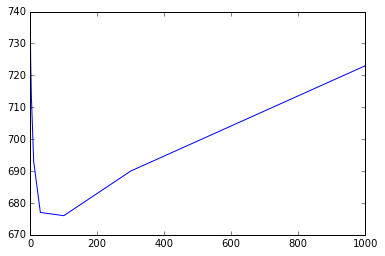

In [25]:
time=[0.1,0.3,1.0,3.0,10.0,30.0,100.0,300.0,1000.0]
plt.plot(time, abiases)

# Trim Overscan:

In [27]:
biaslist=['/Users/student_a8/bias_exp_test/801/83F010801_1_bias.fits', '/Users/student_a8/bias_exp_test/801/83F010801_2_bias.fits', '/Users/student_a8/bias_exp_test/801/83F010801_3_bias.fits', '/Users/student_a8/bias_exp_test/801/83F010801_4_bias.fits', '/Users/student_a8/bias_exp_test/801/83F010801_5_bias.fits', '/Users/student_a8/bias_exp_test/801/83F010801_6_bias.fits','/Users/student_a8/bias_exp_test/801/83F010801_7_bias.fits', '/Users/student_a8/bias_exp_test/801/83F010801_8_bias.fits', '/Users/student_a8/bias_exp_test/801/83F010801_9_bias.fits']
for raw in biaslist:
    on = os.path.split(os.path.dirname(raw))[1] + "_" + os.path.basename(raw)
    image = ccdproc.CCDData.read(raw, unit='adu')
    image = ccdproc.subtract_overscan(image, fits_section='[:100, :]')
    ccdproc.CCDData.write(image, on, format='fits', clobber=True)
    print(on)

801_83F010801_1_bias.fits
801_83F010801_2_bias.fits
801_83F010801_3_bias.fits
801_83F010801_4_bias.fits
801_83F010801_5_bias.fits
801_83F010801_6_bias.fits
801_83F010801_7_bias.fits
801_83F010801_8_bias.fits
801_83F010801_9_bias.fits


In [28]:
tbias01 = fits.open('/Users/student_a8/Huntsman_analysis/801_83F010801_1_bias.fits')[0].data
tbias03 = fits.open('/Users/student_a8/Huntsman_analysis/801_83F010801_2_bias.fits')[0].data
tbias1 = fits.open('/Users/student_a8/Huntsman_analysis/801_83F010801_3_bias.fits')[0].data
tbias3 = fits.open('/Users/student_a8/Huntsman_analysis/801_83F010801_4_bias.fits')[0].data
tbias10 = fits.open('/Users/student_a8/Huntsman_analysis/801_83F010801_5_bias.fits')[0].data
tbias30 =fits.open('/Users/student_a8/Huntsman_analysis/801_83F010801_6_bias.fits')[0].data
tbias100 = fits.open('/Users/student_a8/Huntsman_analysis/801_83F010801_7_bias.fits')[0].data
tbias300 = fits.open('/Users/student_a8/Huntsman_analysis/801_83F010801_8_bias.fits')[0].data
tbias1000 = fits.open('/Users/student_a8/Huntsman_analysis/801_83F010801_9_bias.fits')[0].data

In [29]:
biasestrimmed=[np.median(tbias01), np.median(tbias03), np.median(tbias1), np.median(tbias3), np.median(tbias10), np.median(tbias30), np.median(tbias100), np.median(tbias300), np.median(tbias1000)]

In [30]:
biasestrimmed

[-10.210000000000036,
 -10.57000000000005,
 -11.710000000000036,
 -14.139999999999986,
 -11.980000000000018,
 -12.259999999999991,
 -12.809999999999945,
 -13.759999999999991,
 -14.940000000000055]

In [31]:
biasestrimmean = [tbias01.mean(), tbias03.mean(), tbias1.mean(), tbias3.mean(), tbias10.mean(), tbias30.mean(), tbias100.mean(), tbias300.mean(), tbias1000.mean()]

In [32]:
biasestrimmean

[-10.095767682023334,
 -10.431977504175668,
 -11.541338155617639,
 -14.179647613176664,
 -11.774720447013324,
 -11.912891494832728,
 -11.980264518695307,
 -11.915735176848514,
 -11.018484105125053]

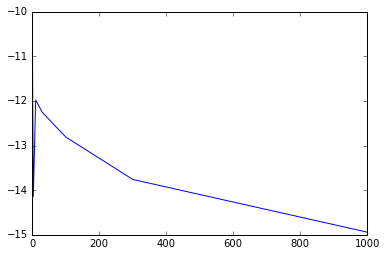

In [121]:
plt.plot(time,biasestrimmed)

# -167 Bias / Exposure Times

In [38]:
bias01 = fits.open('/Users/student_a8/bias_exp_test/167/83F011167_1_bias.fits')[0].data
bias03 = fits.open('/Users/student_a8/bias_exp_test/167/83F011167_2_bias.fits')[0].data
bias1 = fits.open('/Users/student_a8/bias_exp_test/167/83F011167_3_bias.fits')[0].data
bias3 = fits.open('/Users/student_a8/bias_exp_test/167/83F011167_4_bias.fits')[0].data
bias10 = fits.open('/Users/student_a8/bias_exp_test/167/83F011167_5_bias.fits')[0].data
bias30 = fits.open('/Users/student_a8/bias_exp_test/167/83F011167_6_bias.fits')[0].data
bias100 = fits.open('/Users/student_a8/bias_exp_test/167/83F011167_7_bias.fits')[0].data
bias300 = fits.open('/Users/student_a8/bias_exp_test/167/83F011167_8_bias.fits')[0].data
bias1000 = fits.open('/Users/student_a8/bias_exp_test/167/83F011167_9_bias.fits')[0].data


In [39]:
np.median(bias01), np.median(bias03), np.median(bias1), np.median(bias3), np.median(bias10), np.median(bias30), np.median(bias100), np.median(bias300), np.median(bias1000)

(1032.0, 1031.0, 1032.0, 1036.0, 1042.0, 1043.0, 1049.0, 1060.0, 1100.0)

In [40]:
time=[0.1,0.3,1.0,3.0,10.0,30.0,100.0,300.0,1000.0]

biases=[np.median(bias01), np.median(bias03), np.median(bias1), np.median(bias3), np.median(bias10), np.median(bias30), np.median(bias100), np.median(bias300), np.median(bias1000)]
biasset=[abiases, biases, biasestrimmed]

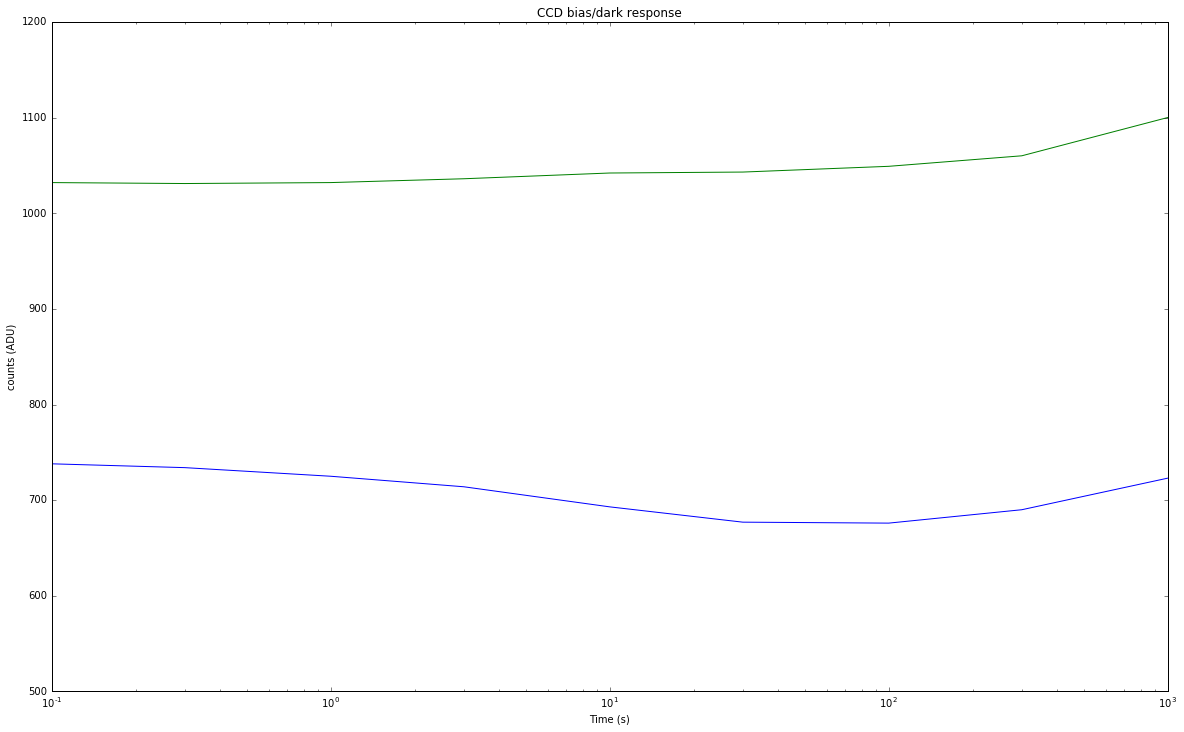

In [42]:
for item in biasset:
    plt.plot(time, item)
plt.xlabel('Time (s)')
plt.ylabel('counts (ADU)')
plt.ylim(500,1200)
plt.title('CCD bias/dark response')
plt.gcf().set_size_inches(20,12)
plt.xscale('log')